<h1>Exploration on Victimization and Discrimation that transgender group reported<h3> These questions are drawn from Q162-168 in 2016-2018 TransPop study.

In [65]:
#packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#trans data
transpop = pd.read_csv('data/transpop.csv')
transpop.head()

,Unnamed: 0,STUDYID,WEIGHT,SURVEYCOMPLETED,GRESPONDENT_DATE,GCENREG,AGE,RACE,RACE_RECODE,RACE_RECODE_CAT5,...,ACE_SEP,ACE_INC,ACE_EMO_I,ACE_PHY_I,ACE_SEX_I,ACE_IPV_I,ACE_SUB_I,ACE_MEN_I,ACE_SEP_I,ACE_INC_I
0,0,151768927,0.986143,0,26-APR-2016,1,65,6,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,152357242,0.379683,0,07-APR-2016,3,38,6,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,152444055,0.705381,0,01-MAY-2016,3,25,6,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,152525272,1.595398,0,20-APR-2016,4,18,6,1,1,...,1,1,1,0,0,1,1,1,1,1
4,4,152894493,1.870422,0,05-MAY-2016,2,30,8,3,3,...,0,0,1,0,0,0,0,0,0,0


In [67]:
total_col = ['Q162A','Q162B','Q162C','Q162D','Q162E','Q162F','Q163_1','Q163_2','Q163_3','Q163_4','Q163_5',
              'Q163_6','Q163_7','Q163_8','Q163_9','Q163_10','Q164','Q165','Q166_1','Q166_2','Q166_3','Q166_4','Q166_5',
               'Q166_6','Q166_7','Q166_8','Q166_9','Q166_10','Q167','Q168_1','Q168_2','Q168_3','Q168_4','Q168_5','Q168_6',
               'Q168_7','Q168_8','Q168_9','Q168_10'
              ]

<H3>I. Victimization, Discrimination, and Attribution

162_A: Since age of 18, how often have you of the following happened to you? You were ***hit, beaten, physically attacked, or sexually***<br>
162_B:Since age of 18, how often have you of the following happened to you? You were ***robbed, or your property was stolen, vandalized, or purposely damaged***<br>
162_C: Since the age of 18, how often have any of the following happened to you? Someone tried to ***attack you, rob you, or damage your property, but they didn't succeed***<br>
162_D: Since the age of 18, how often have any of the following happened to you? Someone ***threatened you with violence***<br>
162_E: Since the age of 18, how often have any of the following happened to you? Someone ***verbally insulted or abused you***<br>
162_F: Since the age of 18, how often have any of the following happened to you? Someone ***threw an object at you***<br>

1- Never<br>
2- Once<br>
3- Twice<br>
4- Three or more times<br>

In [68]:
trans_162 = transpop[['Q162A','Q162B','Q162C','Q162D','Q162E','Q162F']]

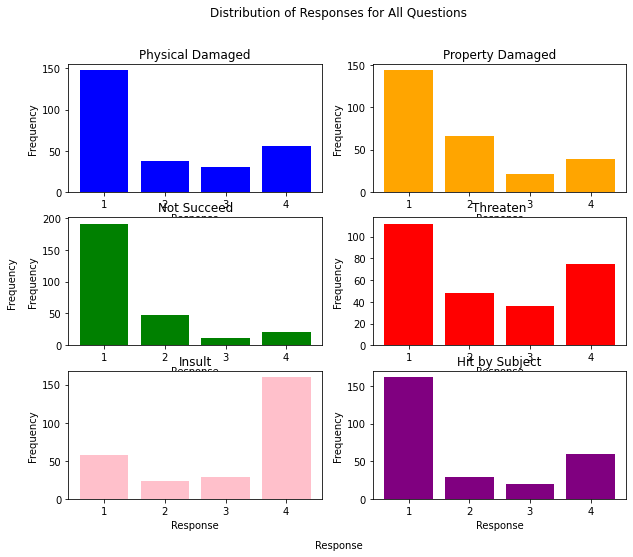

In [69]:
colors = ['blue', 'orange', 'green', 'red','pink','purple']
label_names = {1:'Never',2:'Once',3:'Twice',4:'Three or more times'}
total = []
question_name = ['Physical Damaged','Property Damaged','Not Succeed','Threaten','Insult','Hit by Subject']
questions=dict(zip(list(trans_162.columns),question_name))
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.flatten()

# Loop through each question column
for i, col in enumerate(trans_162.columns):
    counting = pd.to_numeric(trans_162[col], errors='coerce').astype('float').value_counts()
    total.append(dict(counting))
    # Plot a histogram of the responses on the appropriate subplot
    axs[i].bar(counting.index, counting.values, color=colors[i % len(colors)])
    # Set the title of the subplot
    axs[i].set_title(questions[col])
    axs[i].set_xlabel('Response')
    axs[i].set_ylabel('Frequency')

# Add overall title and axis labels
fig.suptitle('Distribution of Responses for All Questions')
fig.text(0.5, 0.04, 'Response', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Show the plot
plt.show()

In [70]:
#get total number of each category
sum_dict = {}
for d in total:
    for k, v in d.items():
        if k in sum_dict:
            sum_dict[k] += v
        else:
            sum_dict[k] = v
sum_dict

{1.0: 814, 4.0: 411, 2.0: 250, 3.0: 148}

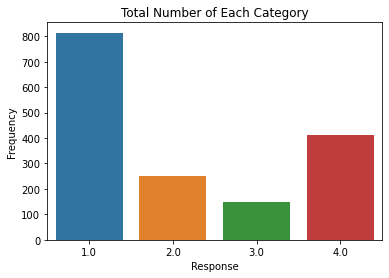

In [72]:
sns.barplot(x=list(sum_dict.keys()), y=list(sum_dict.values()))

plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Total Number of Each Category')
plt.show()


Attribution<br>
<h>1. Age<br>
   2. Sex(Being Female or Male)<br>3. Being Transgender<br> 4. Gender Expression or Appearance <br> 5. Race<br> 6. Income level or education<br> 7. Sexual orientation<br> 8. Physical appearance (e.g., weight, height)<br> 9. Religion/spirituality<br> 10. Disability<br>

In [73]:
trans_163 = transpop[['Q163_1','Q163_2','Q163_3','Q163_4','Q163_5',
              'Q163_6','Q163_7','Q163_8','Q163_9','Q163_10']]
trans_163.head()

,Q163_1,Q163_2,Q163_3,Q163_4,Q163_5,Q163_6,Q163_7,Q163_8,Q163_9,Q163_10
0,,,,,,,,,,
1,,,,4,,,,8,,
2,,2,3,4,,,7,,,10
3,7,7,7,7,7,7,97,97,97,97
4,1,2,,,,,,,,


In [74]:
total = {}
for col in trans_163.columns:
    total[col]= sum(trans_163[col]!=' ')
factors = ['Age','Sex','Transgender','Gender Expression or Appearance','Race','Income level','Sexual orientation','Physical appearance','Religion','Disability']

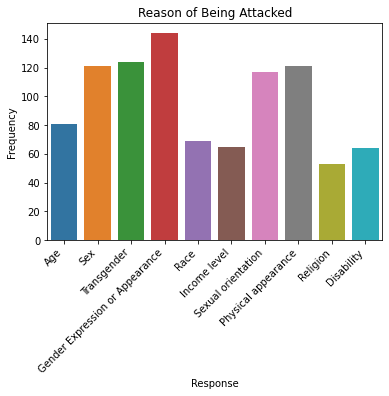

In [61]:
sns.barplot(x=list(total.keys()), y=list(total.values()))

plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Reason of Being Attacked')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(factors, rotation=45, ha='right')

plt.show()

<H3> II. Job Descrimination Attribution<H3>
    

Attribution<br>
<h>1. Age<br>
   2. Sex(Being Female or Male)<br>3. Being Transgender<br> 4. Gender Expression or Appearance <br> 5. Race<br> 6. Income level or education<br> 7. Sexual orientation<br> 8. Physical appearance (e.g., weight, height)<br> 9. Religion/spirituality<br> 10. Disability<br>

In [77]:
job = transpop[['Q166_1','Q166_2','Q166_3','Q166_4','Q166_5',
               'Q166_6','Q166_7','Q166_8','Q166_9','Q166_10']]

In [86]:
total_job = {}
for col in job.columns:
    total_job[col]= sum(job[col]!=' ')

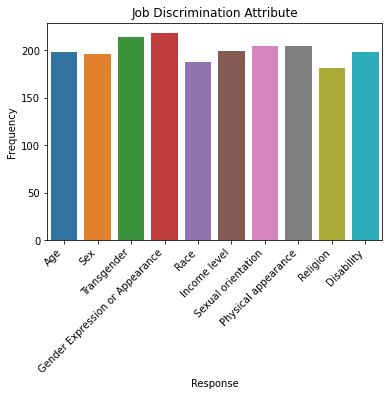

In [88]:
sns.barplot(x=list(total_job.keys()), y=list(total_job.values()))

plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Job Discrimination Attribute')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(factors, rotation=45, ha='right')

plt.show()



<h3>III. Housing Discrimination Attribution 

In [90]:
housing = transpop[['Q168_1','Q168_2','Q168_3','Q168_4','Q168_5','Q168_6',
               'Q168_7','Q168_8','Q168_9','Q168_10']]

In [91]:
total_housing = {}
for col in housing.columns:
    total_housing[col]= sum(housing[col]!=' ')


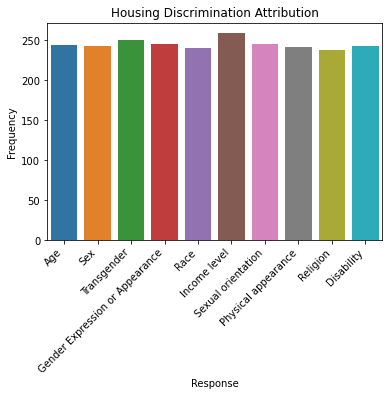

In [92]:
sns.barplot(x=list(total_housing.keys()), y=list(total_housing.values()))

plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Housing Discrimination Attribution')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(factors, rotation=45, ha='right')

plt.show()